In [1]:
from dlib_models import load_dlib_models
import numpy as np
# this loads the dlib models into memory. You should only import the models *after* loading them.
# This does lazy-loading: it doesn't do anything if the models are already loaded.
load_dlib_models()

from dlib_models import models

face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

In [2]:
def descriptions(img_array):
    import skimage.io as io
    face_detect = models["face detect"]

    # Number of times to upscale image before detecting faces.
    # When would you want to increase this number?
    upscale = 1 

    detections = face_detect(img_array, upscale)  # returns sequence of face-detections
    detections = list(detections)
    descriptors = []
    for det in detections:
        shape_predictor = models["shape predict"]
        shape = shape_predictor(img_array, det)
        descriptors.append(np.array(face_rec_model.compute_face_descriptor(img_array, shape)))
    return descriptors

In [3]:
def dbfromfiles():
    import skimage.io as io
    import os
    rootDir = "photos/robinwilliams"
    fileSet = set()

    db = []
    for dir_, _, files in os.walk(rootDir):
        for fileName in files:
            relDir = os.path.relpath(dir_, rootDir)
            relFile = os.path.join(rootDir, fileName)
            if not fileName.startswith('.'):
                fileSet.add(relFile)
    for file in fileSet:
        img_array = io.imread(file)
        db.append((descriptions(img_array)[0], "Robin"))
    rootDir = "photos/tomhanks"
    for dir_, _, files in os.walk(rootDir):
        for fileName in files:
            relDir = os.path.relpath(dir_, rootDir)
            relFile = os.path.join(rootDir, fileName)
            if not fileName.startswith('.'):
                fileSet.add(relFile)
    for file in fileSet:
        img_array = io.imread(file)
        db.append((descriptions(img_array)[0], "Tom"))
    # read a picture in as a numpy-array
    
    return db

In [4]:
db = dbfromfiles()

In [5]:
np.array(db)[0][0].shape

(128,)

In [6]:
import skimage.io as io
img_array = io.imread("photos/robinwilliamstest.jpg")

In [7]:
des = descriptions(img_array)

In [8]:
def findMatch(d, db):
    dists = []
    for i in db:
        dists.append(np.linalg.norm(d-i[0]))
    b = np.argmin(dists)
    print(np.min(dists))
    if(dists[b] < 0.7):
        return db[b][1]
    else:
        return "I don't know"

In [9]:
findMatch(des[0], db)

0.526224741026


'Robin'

In [10]:
import camera
from camera import take_picture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook
def pic(): 
    img_array = take_picture()
    return img_array

In [11]:
#p = pic()
p = io.imread("photos/multiple.jpeg")
for d in descriptions(p):
    print(findMatch(d, db))
    #descriptions(p).shape

0.74061471023
I don't know
0.382098216379
Tom
0.774068092302
I don't know
0.546410266747
Robin
0.723687807422
I don't know


In [30]:
def show(p):
    face_detect = models["face detect"]

    fig,ax = plt.subplots()
    ax.imshow(p)
    # Number of times to upscale image before detecting faces.
    # When would you want to increase this number?
    upscale = 1

    detections = face_detect(p, upscale)  # returns sequence of face-detections
    detections = list(detections)
    for det in detections:
        # bounding box dimensions for detection
        shape_predictor = models["shape predict"]
        shape = shape_predictor(p, det)
        descriptor = (np.array(face_rec_model.compute_face_descriptor(p, shape)))
        m = findMatch(descriptor, db)
        l, r, t, b = det.left(), det.right(), det.top(), det.bottom() 
        ax.add_patch(
        patches.Rectangle(
            (l, b),   # (x,y)
            r - l,          # width
            t - b,          # height
            edgecolor='green',
            fill=False
            )
        )
        ax.text(l, b, m, fontsize=10, color='green')
        print(l, r, t, b)

<IPython.core.display.Javascript object>


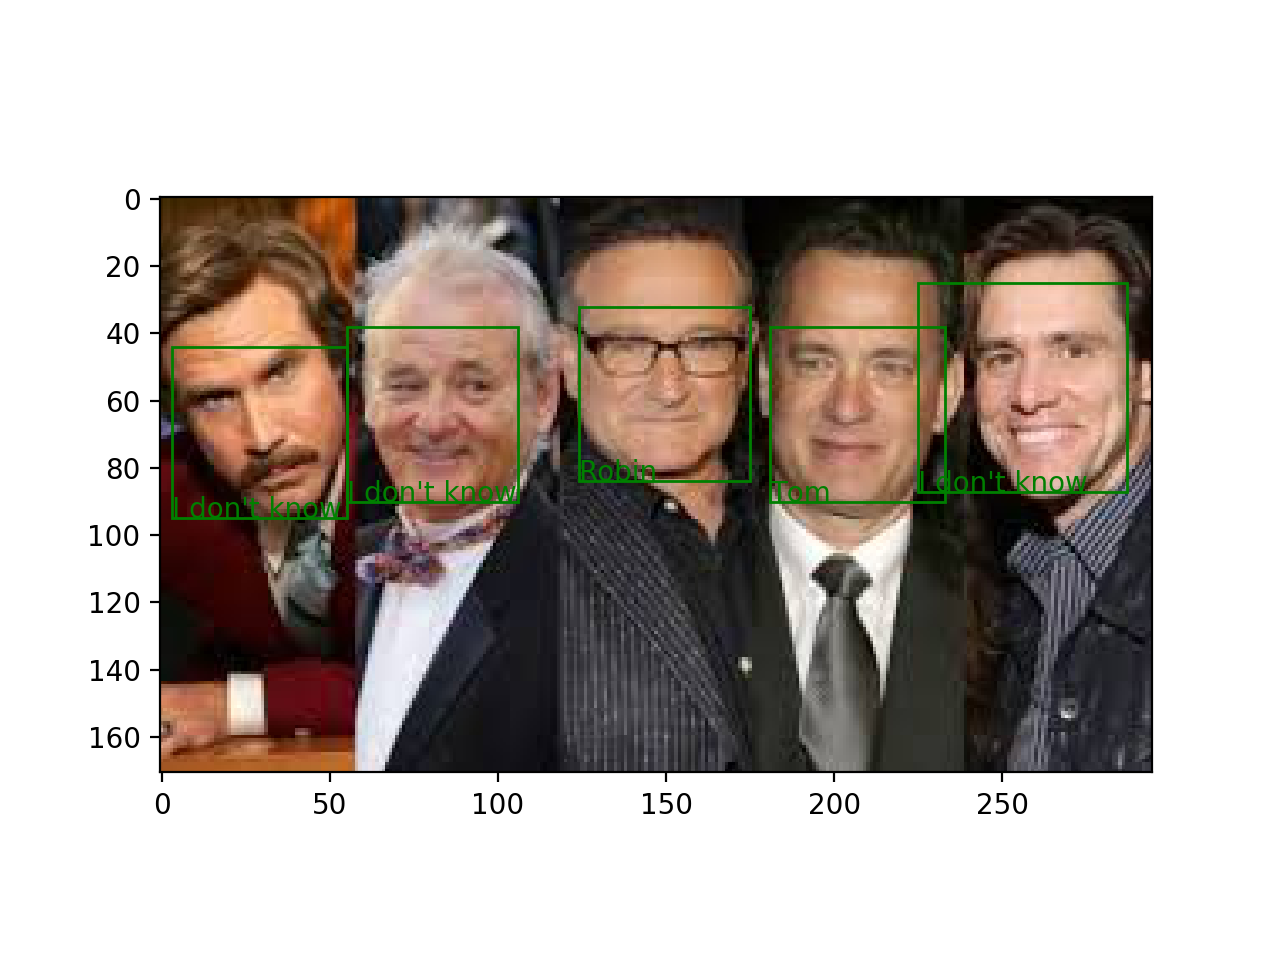

0.74061471023
225 287 25 87
0.382098216379
181 233 38 90
0.774068092302
55 106 38 90
0.546410266747
124 175 32 84
0.723687807422
3 55 44 95


In [31]:
show(p)

In [ ]:
def addP(p, name):
    db.append(descriptions(p), name)